In [1]:
# Feature Extraction and Price Prediction for Mobile Phones

In [225]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
import joblib
import re

In [3]:
# Data Collection & Preparation

In [227]:
dataset = pd.read_excel(r"D:\Next hike 4-project-Feb-25\Processed_Flipdata.xlsx")

In [229]:
dataset

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999
...,...,...,...,...,...,...,...,...,...,...,...,...
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,79999
537,638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,5998
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,9990
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core",38999


In [231]:
dataset.head()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999


In [7]:
### Data Overview- Provides Insight into Dataset Structure and Characteristics

In [233]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 50.8+ KB


In [9]:
# **Summary Of Dataset**

In [237]:
dataset.describe(include = 'all')

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
count,541.000000,541,541,541.000000,541.000000,541.000000,541,541,541.000000,541.000000,541,541.000000
unique,NaN,187,275,NaN,NaN,NaN,14,13,NaN,NaN,123,NaN
top,NaN,vivo Y16,Yellow,NaN,NaN,NaN,50MP,16MP,NaN,NaN,Qualcomm Snapdragon 680,NaN
freq,NaN,9,12,NaN,NaN,NaN,260,164,NaN,NaN,33,NaN
mean,289.711645,NaN,NaN,110.550832,5.397412,4871.587800,NaN,NaN,0.062847,16.431201,NaN,16228.375231
std,182.359185,NaN,NaN,60.600694,1.984923,780.148862,NaN,NaN,0.242911,2.523553,NaN,10793.588322
min,0.000000,NaN,NaN,16.000000,2.000000,800.000000,NaN,NaN,0.000000,4.500000,NaN,920.000000
25%,135.000000,NaN,NaN,64.000000,4.000000,5000.000000,NaN,NaN,0.000000,16.510000,NaN,9290.000000
50%,273.000000,NaN,NaN,128.000000,6.000000,5000.000000,NaN,NaN,0.000000,16.710000,NaN,13499.000000
75%,434.000000,NaN,NaN,128.000000,8.000000,5000.000000,NaN,NaN,0.000000,16.940000,NaN,19280.000000


In [11]:
### Retriving Column names

In [239]:
dataset.columns

Index(['Unnamed: 0', 'Model', 'Colour', 'Memory', 'RAM', 'Battery_',
       'Rear Camera', 'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_',
       'Prize'],
      dtype='object')

In [13]:
### Statistical Summary of mobile_data

In [241]:
dataset.describe().round(2)

,Unnamed: 0,Memory,RAM,Battery_,AI Lens,Mobile Height,Prize
count,541.00,541.00,541.00,541.00,541.00,541.00,541.00
mean,289.71,110.55,5.40,4871.59,0.06,16.43,16228.38
std,182.36,60.60,1.98,780.15,0.24,2.52,10793.59
min,0.00,16.00,2.00,800.00,0.00,4.50,920.00
25%,135.00,64.00,4.00,5000.00,0.00,16.51,9290.00
50%,273.00,128.00,6.00,5000.00,0.00,16.71,13499.00
75%,434.00,128.00,8.00,5000.00,0.00,16.94,19280.00
max,642.00,256.00,8.00,7000.00,1.00,41.94,80999.00


In [15]:
### Dataset Dimensions and Structure

In [243]:
rows, col = dataset.shape
print ("Dimensions of dataset: {}" . format (dataset.shape))
print ('Rows:', rows, '\nColumns:', col)

Dimensions of dataset: (541, 12)
Rows: 541 
Columns: 12


In [17]:
### Finding the Missing values

In [245]:
dataset.isnull().sum()

Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

In [19]:
### Convert Object to Integer

In [247]:
import re

dataset['Rear Camera'] = dataset['Rear Camera'].apply(lambda x: re.search(r'\d+', str(x)).group() if re.search(r'\d+', str(x)) else None)
dataset['Front Camera'] = dataset['Front Camera'].apply(lambda x: re.search(r'\d+', str(x)).group() if re.search(r'\d+', str(x)) else None)

dataset['Rear Camera'] = pd.to_numeric(dataset['Rear Camera'], errors='coerce')
dataset['Front Camera'] = pd.to_numeric(dataset['Front Camera'], errors='coerce')

In [249]:
dataset

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50,16,0,16.64,Qualcomm Snapdragon 680,11999
3,3,POCO C50,Royal Blue,32,2,5000,8,5,0,16.56,Mediatek Helio A22,5649
4,4,Infinix HOT 30i,Marigold,128,8,5000,50,5,1,16.76,G37,8999
...,...,...,...,...,...,...,...,...,...,...,...,...
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50,12,0,15.49,Qualcomm Snapdragon 8 Gen 2,79999
537,638,LAVA Z21,Cyan,32,2,3100,5,2,0,12.70,Octa Core,5998
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50,8,0,16.76,MediaTek Helio G35,9990
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50,32,0,16.26,"Exynos 1380, Octa Core",38999


In [22]:
# * We have replaced the 'Rear Camera' and 'Front Camera' columns, which were initially in object format, and converted them to integer type. This conversion is beneficial when dealing with numerical values in these columns, enabling operations such as mathematical calculations & Model building

In [23]:
### After Conversion finding the data type

In [251]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    int64  
 7   Front Camera   541 non-null    int64  
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 50.8+ KB


In [25]:
### Dataset Adjustment: Removing 'Unnamed: 0' Column from mobile_data

In [253]:
dataset = dataset.drop(columns=['Unnamed: 0'])
dataset

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,MOTOROLA G32,Mineral Gray,128,8,5000,50,16,0,16.64,Qualcomm Snapdragon 680,11999
3,POCO C50,Royal Blue,32,2,5000,8,5,0,16.56,Mediatek Helio A22,5649
4,Infinix HOT 30i,Marigold,128,8,5000,50,5,1,16.76,G37,8999
...,...,...,...,...,...,...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50,12,0,15.49,Qualcomm Snapdragon 8 Gen 2,79999
537,LAVA Z21,Cyan,32,2,3100,5,2,0,12.70,Octa Core,5998
538,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50,8,0,16.76,MediaTek Helio G35,9990
539,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50,32,0,16.26,"Exynos 1380, Octa Core",38999


In [27]:
# Converting String to Integer

In [255]:
dataset['Prize'] = dataset['Prize'].astype(str).str.replace(',', '').astype('int64')

In [29]:
# Rename the name of the Columns

In [257]:
dataset = dataset.rename(columns={'Prize':'Price', 'Battery_':'Battery', 'Processor_':'Processor'})
dataset

,Model,Colour,Memory,RAM,Battery,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor,Price
0,Infinix SMART 7,Night Black,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,MOTOROLA G32,Mineral Gray,128,8,5000,50,16,0,16.64,Qualcomm Snapdragon 680,11999
3,POCO C50,Royal Blue,32,2,5000,8,5,0,16.56,Mediatek Helio A22,5649
4,Infinix HOT 30i,Marigold,128,8,5000,50,5,1,16.76,G37,8999
...,...,...,...,...,...,...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50,12,0,15.49,Qualcomm Snapdragon 8 Gen 2,79999
537,LAVA Z21,Cyan,32,2,3100,5,2,0,12.70,Octa Core,5998
538,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50,8,0,16.76,MediaTek Helio G35,9990
539,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50,32,0,16.26,"Exynos 1380, Octa Core",38999


In [377]:
# Unique Values Analysis: Counting and Displaying the Number of Unique Values for Each Column in the Dataset

In [259]:
unique = dataset.nunique()
unique.to_frame().T

,Model,Colour,Memory,RAM,Battery,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor,Price
0,187,275,5,5,37,14,13,2,38,123,158


In [33]:
# Unique Items in Dataset: Extracting and Displaying Distinct Values

In [261]:
dataset['Model'].unique()

array(['Infinix SMART 7', 'MOTOROLA G32', 'POCO C50', 'Infinix HOT 30i',
       'REDMI 10', 'SAMSUNG Galaxy F13', 'SAMSUNG Galaxy F04', 'POCO C51',
       'MOTOROLA e13', 'vivo T2x 5G', 'Infinix Smart 7 HD', 'REDMI A1+',
       'POCO C55', 'MOTOROLA g13', 'POCO M4 5G', 'MOTOROLA e32',
       'vivo T2 5G', 'MOTOROLA G62 5G', 'POCO M5', 'realme C33 2023',
       'SAMSUNG Galaxy F14 5G', 'MOTOROLA g73 5G', 'realme C30',
       'POCO X5 5G', 'POCO M4 Pro', 'REDMI 11 Prime', 'realme C55',
       'realme 10 Pro 5G', 'Micromax IN 2C', 'POCO M4 Pro 5G',
       'realme Narzo 30 Pro 5G', 'micromax 2', 'Infinix Note 12 Pro 5G',
       'SAMSUNG Galaxy F23 5G', 'micromax', 'MOTOROLA Edge 40',
       'micromax 1', 'realme Narzo 30', 'Infinix NOTE 12i', 'realme 10',
       'realme 8i', 'Micromax 3', 'Google Pixel 6a', 'Infinix HOT 20 5G',
       'realme GT 2', 'REDMI Note 12', 'REDMI Note 12 5G', 'micromax 3',
       'SAMSUNG Galaxy M04', 'REDMI K50i 5G', 'MOTOROLA e40',
       'REDMI 9 Activ', 'MOTO

In [35]:
dataset['Colour'].unique()

array(['Night Black', 'Azure Blue', 'Mineral Gray', 'Royal Blue',
       'Marigold', 'Glacier Blue', 'Mirror Black', 'Diamond White',
       'Shadow Black', 'Emerald Green', 'Waterfall Blue', 'Opal Green',
       'Power Black', 'Country Green', 'Cosmic Black', 'Aurora Gold',
       'Marine Blue', 'Glimmer Black', 'Green Apple', 'Black',
       'Light Blue', 'Light Green', 'Cool Blue', 'Forest Green',
       'Nightsky Green', 'Matte Charcoal', 'Eco Black', 'Caribbean Green',
       'Jade Purple', 'Satin Silver', 'Sunrise Orange', 'Sunrise Copper',
       'Arctic Blue', 'Lavender Blue', 'Velocity Wave', 'Nitro Blaze',
       'Frosted Blue', 'Yellow', 'Midnight Gray', 'Creamy White',
       'Sandy Gold', 'Aqua Blue', 'GOAT Green', 'Midnight Blue',
       'Night Sea', 'Bamboo Green', 'Lake Blue', 'Denim Black',
       'Wildcat Blue', 'Icy Blue', 'Flashy Black', 'Sunshower',
       'Rainy Night', 'Rainforest', 'B.A.E. Purple', 'Peppy Purple',
       'Lucent White', 'Dark Matter', 'Nebula Bl

In [263]:
dataset['Memory'].unique()

array([ 64, 128,  32, 256,  16], dtype=int64)

In [265]:
dataset['RAM'].unique()

array([4, 8, 2, 6, 3], dtype=int64)

In [267]:
dataset['Battery'].unique()

array([6000, 5000, 4500,  800, 1900, 1000, 4400, 1020, 4410, 5080, 2550,
       4980, 4600, 1200, 1500, 3300, 4020, 4300, 4800, 4200, 4610, 4050,
       4270, 4000, 4030, 4115, 3000, 3110, 4700, 5020, 4323, 4830, 5200,
       7000, 2815, 3900, 3100], dtype=int64)

In [269]:
dataset['Rear Camera'].unique()

array([ 13,  50,   8,  40,  32,  48,  64, 108,   0,   2,  12, 200,   5,
        16], dtype=int64)

In [40]:
dataset['Front Camera'].unique()

array([ 5, 16,  8, 13,  0, 32, 10, 50, 60, 20, 44,  2, 12], dtype=int64)

In [271]:
dataset['AI Lens'].unique()

array([1, 0], dtype=int64)

In [273]:
dataset['Mobile Height'].unique()

array([16.76, 16.64, 16.56, 17.02, 16.51, 16.71, 17.04, 16.21, 16.94,
       16.33, 41.94, 17.07,  4.5 ,  7.11, 16.26,  6.1 , 15.6 , 16.81,
        5.08, 16.59, 16.43, 16.66, 17.22, 16.36, 17.32, 15.46,  4.57,
       16.54, 15.49, 16.  , 15.7 , 16.69, 15.8 , 13.84, 17.53, 16.55,
       17.65, 12.7 ])

In [43]:
dataset['Processor'].unique()

array(['Unisoc Spreadtrum SC9863A1', 'Qualcomm Snapdragon 680',
       'Mediatek Helio A22', 'G37', 'Exynos 850', 'Mediatek Helio P35',
       'Helio G36', 'Unisoc T606', 'Dimensity 6020',
       'Spreadtrum SC9863A1', 'Mediatek Helio G85', 'Helio G85',
       'Mediatek Dimensity 700', 'Mediatek Helio G37', 'Snapdragon 695',
       'Qualcomm Snapdragon 695 5G', 'Mediatek Helio G99', 'Unisoc T612',
       'Exynos 1330, Octa Core ', 'Mediatek Dimensity 930',
       'Qualcomm Snapdragon 695', 'Mediatek Helio G96', 'Helio G99',
       'Helio G88', 'SC6531E', 'Mediatek Dimensity 810',
       'MediaTek Dimensity 800U', 'Mediatek Dimensity 810 5G',
       'Qualcomm Snapdragon 750G', 'Dimensity 8020', 'MediaTek Helio G95',
       'Mediatek Helio G99 Octa Core', 'MediaTek Helio G96', 'MediaTek',
       'Google Tensor', 'Dimensity 810', 'Qualcomm Snapdragon 888',
       'Snapdragon 685', 'Qualcomm Snapdragon 4 Gen 1', '0 0 0 208MHz',
       'MediaTek Helio P35', 'Dimensity 8100', 'UNISOC T700',


In [44]:
dataset['Price'].unique()

array([ 7299, 11999,  5649,  8999,  7999,  9499, 10699,  6999, 15999,
       13999, 12999,  6199,  6599,  7749,  9699,  9999, 10999, 20999,
       15499, 18999, 12499, 10499, 14490, 16999,  6499,  5999,  6299,
       16499, 14499, 13490, 19999,  1449,  1849,  1422, 29999,  1299,
       17999, 11499,  2615, 28999, 23999, 14999,  2490,  7961,  2499,
       11248,  6799, 13499,  8749,  8049,  1375,  1599,  7499,  7245,
       26999, 21999, 17499, 21499,  7115, 49999, 32999,  8499, 25999,
        4999,  3549,  1699,   920, 11970,  1199, 12990,  6978,  7370,
       44999,  8995, 24999, 11249, 34999, 21174, 43999,  7993,  8069,
       30499, 30999,  9290,  8449,  8495, 29499, 20998, 19280,  8649,
       19499,  9349,  8288, 12272,  6794, 27540, 27877,  5990, 11980,
       11349,  9790, 28298, 22999,  7049,  6960,  9104, 36999, 30385,
       19990, 12900,  8990, 10943, 55999, 13489, 11209, 16988, 12989,
        7190,  7990, 27999, 19397, 10989, 16990, 29990, 38920,  9387,
       29790,  5799,

In [45]:
#Grouping and Calculating Mean Prices

In [275]:
dataset[['RAM','Price']].groupby(['RAM'],as_index=False).mean().round(2)

,RAM,Price
0,2,7864.70
1,3,9893.40
2,4,11770.92
3,6,17405.97
4,8,24186.67


In [277]:
dataset[['Memory','Price']].groupby(['Memory'],as_index=False).mean().round(2)

,Memory,Price
0,16,2981.00
1,32,6749.29
2,64,10585.01
3,128,19620.41
4,256,28002.71


In [379]:
dataset[['Battery','Price']].groupby(['Battery'],as_index=False).mean().round(2)

,Battery,Price
0,800,1627.20
1,1000,1240.25
2,1020,2537.67
3,1200,3549.00
4,1500,1199.00
5,1900,1849.00
6,2550,1375.00
7,2815,53999.00
8,3000,6049.00
9,3100,5998.00


In [49]:
# Descriptive Statistics for Mobile Data Features

In [279]:
dataset.iloc[:, :-1].describe().T.style.format("{:.2f}").background_gradient(cmap="Greens")\
    .bar(subset=["max"], color='#F8766D')\
    .bar(subset=["mean"], color='#00BFC4')\
    .set_table_styles([{'selector': 'thead', 'props': [('background', '#606060'), ('color', 'white')]}])\
    .set_properties(**{'text-align': 'center'}).set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])\
    .set_properties(subset=["count", "mean", "min", "25%", "50%", "75%", "max"], **{'text-align': 'center'})

,count,mean,std,min,25%,50%,75%,max
Memory,541.00,110.55,60.60,16.00,64.00,128.00,128.00,256.00
RAM,541.00,5.40,1.98,2.00,4.00,6.00,8.00,8.00
Battery,541.00,4871.59,780.15,800.00,5000.00,5000.00,5000.00,7000.00
Rear Camera,541.00,46.11,31.26,0.00,13.00,50.00,50.00,200.00
Front Camera,541.00,11.99,9.05,0.00,5.00,8.00,16.00,60.00
AI Lens,541.00,0.06,0.24,0.00,0.00,0.00,0.00,1.00
Mobile Height,541.00,16.43,2.52,4.50,16.51,16.71,16.94,41.94


In [51]:
### Data Type Segmentation: Identifying and Categorizing Columns into Numeric and Categorical in Mobile Data

In [381]:
numeric_df = dataset.select_dtypes(include=[np.number])
categorical_df = dataset.select_dtypes(exclude=[np.number])

numerical = numeric_df.columns.tolist()
categorical = categorical_df.columns.tolist()

print('Categorical:', categorical)
print('\nNumeric:', numerical)

Categorical: []

Numeric: ['Memory', 'RAM', 'Battery', 'Rear Camera', 'Front Camera', 'AI Lens', 'Mobile Height', 'Price']


In [53]:
### Custom Boxplots for Numeric Variables: Visualizing Data Distribution and Skewness in Mobile Data

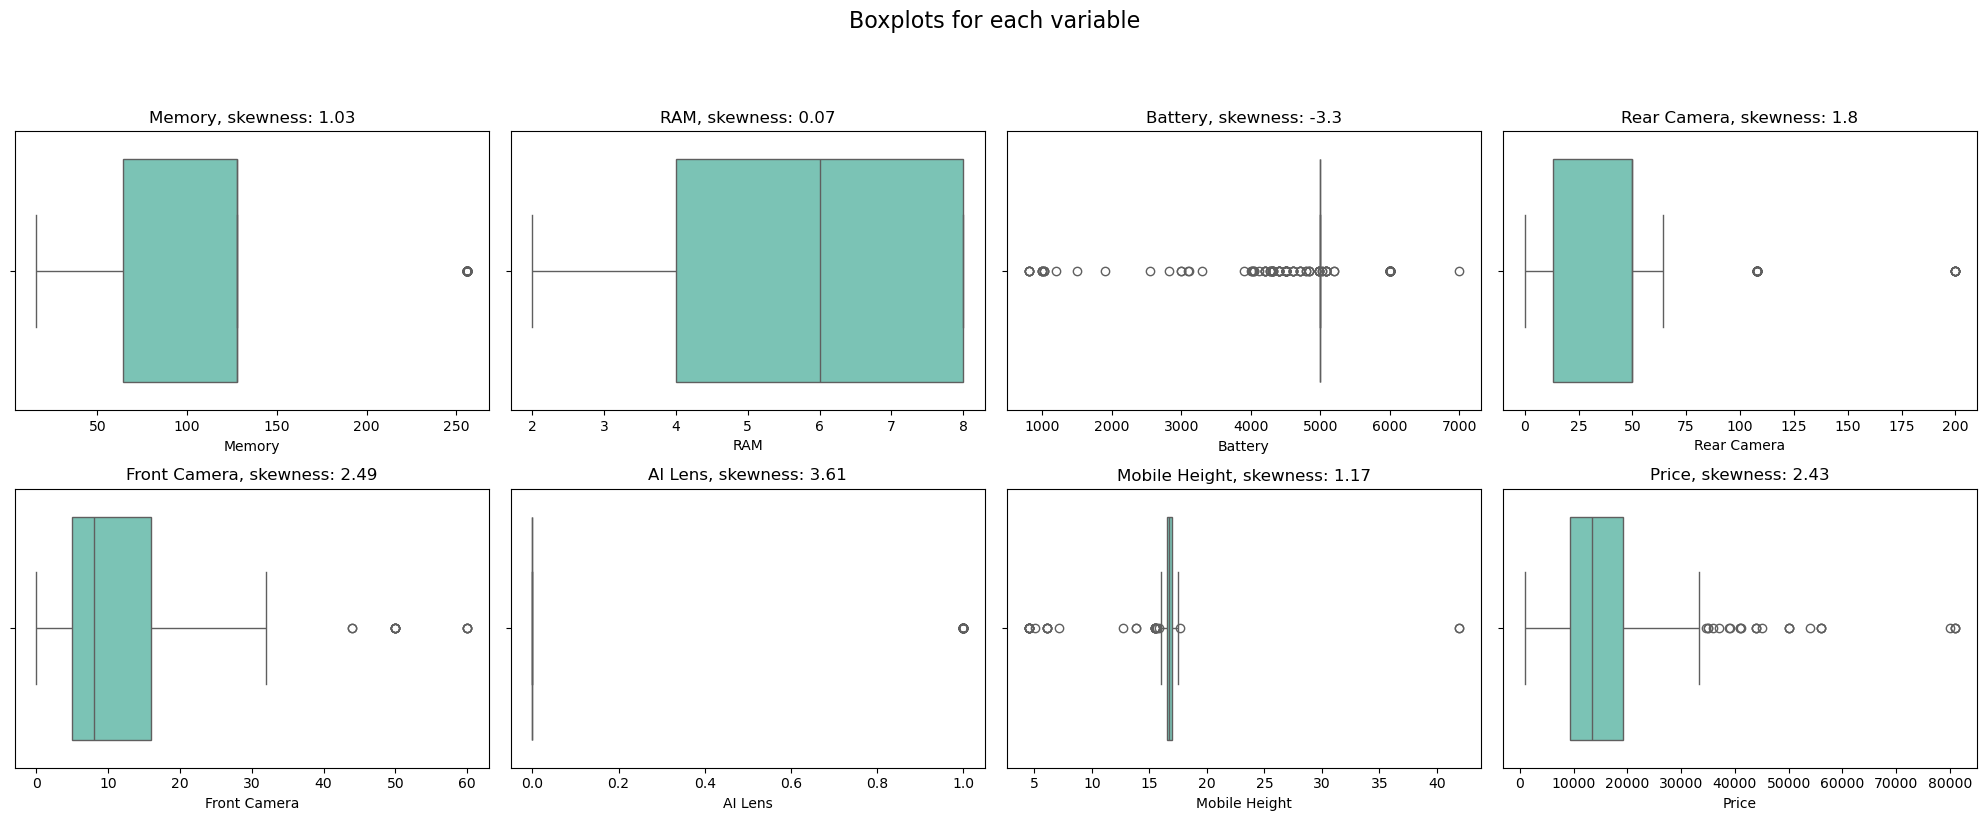

In [383]:
import seaborn as sns

def boxplots_custom(dataset, columns_list, suptitle):
    num_columns = len(columns_list)
    
    fig, axs = plt.subplots(2, num_columns//2 + num_columns%2, sharey=True, figsize=(20, 8))
    axs = axs.flatten()
    fig.suptitle(suptitle, y=1.02, size=16)

    for i, data in enumerate(columns_list): 
        row = i // (num_columns//2 + num_columns%2)
        col = i % (num_columns//2 + num_columns%2)

        sns.boxplot(data=dataset[data], orient='h', color='#6fcfbc', ax=axs[i])
        
        axs[i].set_title(data + ', skewness: ' + str(round(dataset[data].skew(axis=0, skipna=True), 2)))

    plt.tight_layout(rect=[0, 0, 1, 0.96]) 

boxplots_custom(dataset, columns_list=numerical, suptitle='Boxplots for each variable')
plt.show()

In [55]:
#  The data distribution and skewness values for various mobile data attributes provide insights into their respective distributions. 
# Memory and RAM exhibit relatively mild skewness, with values of 1.03 and 0.07, respectively, indicating moderately symmetrical distributions. 
#  The battery skewness of -3.3 suggests a pronounced negative skewness, signifying concentration towards higher battery levels. * The rare camera skewness of 1.8 and front camera skewness of 2.49 both indicate positive skewness, implying prevalent higher values, possibly reflecting better camera specifications in most mobile devices.
# AI_lense skewness of 3.61 suggests a highly positively skewed distribution, indicating that higher values are significantly more common in AI lens specifications. 
# The Mobile Height skewness of 1.7 indicates a moderately positively skewed distribution, implying that taller mobile devices are more prevalent. 
#  The price skewness of -2.43 denotes a negatively skewed distribution, suggesting that a majority of mobile devices have lower prices.

# Conclusion , these skewness values collectively contribute to a comprehensive understanding of the distribution patterns across various mobile data attributes.

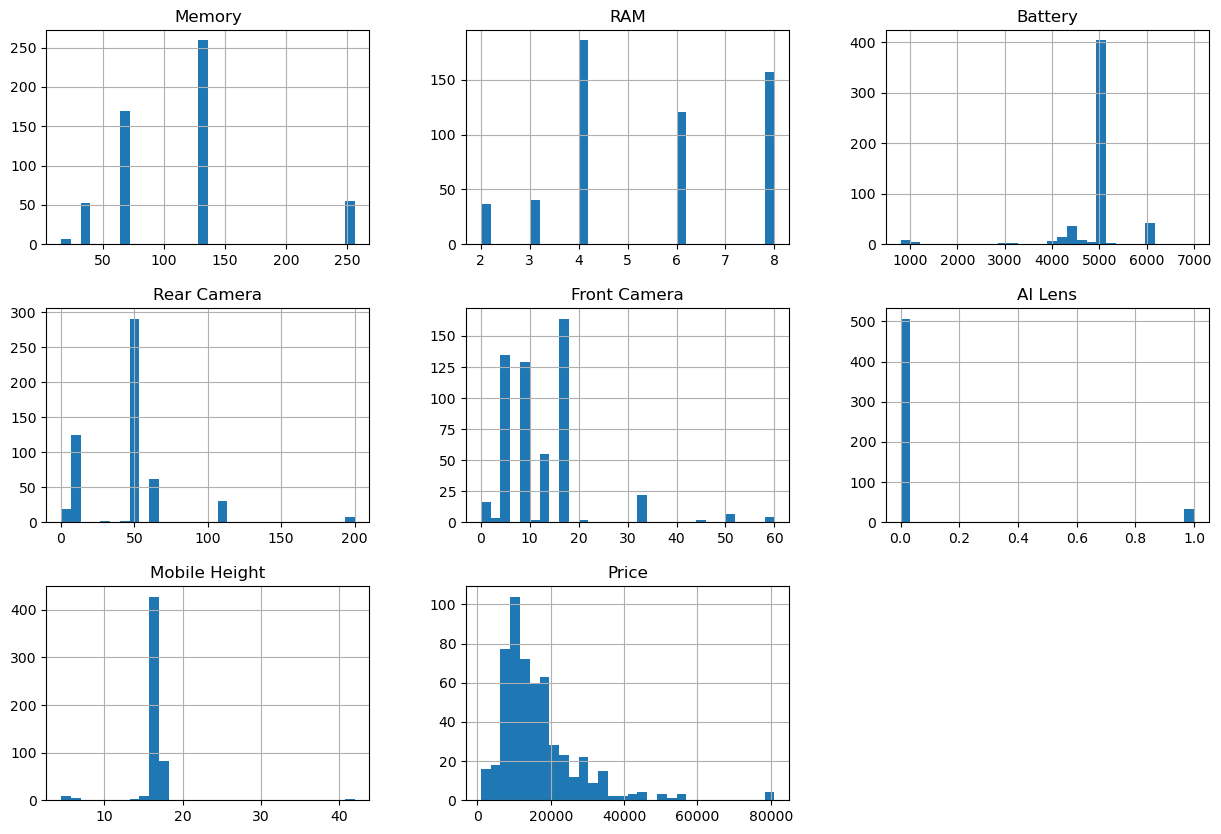

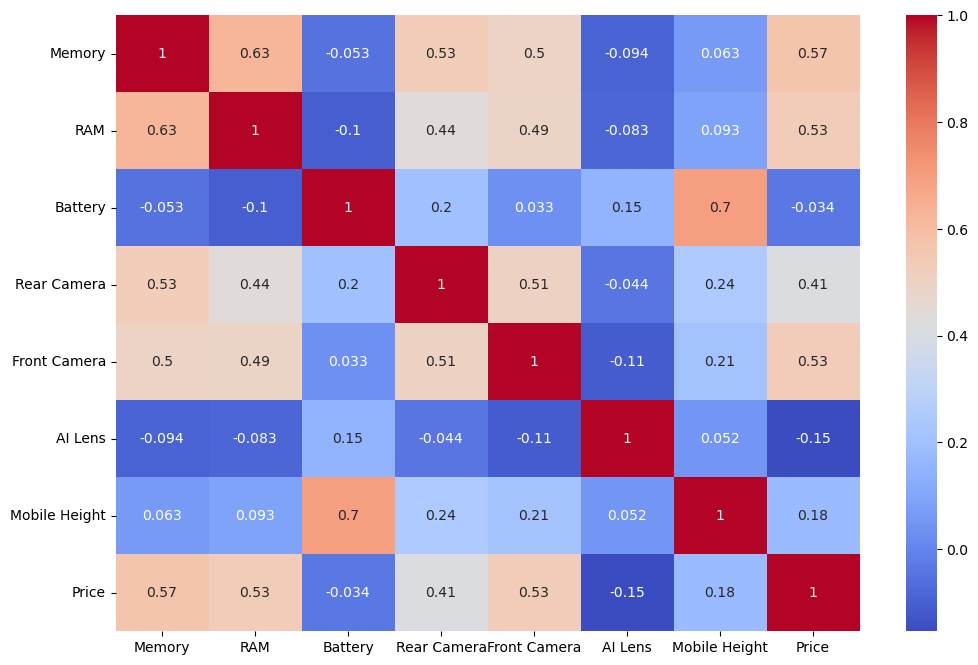

In [287]:
# Handle non-numerical columns before calculating correlation
dataset = dataset.select_dtypes(include=['number']) # Select only numerical columns

# Distribution of numerical features
dataset.hist(bins=30, figsize=(15, 10))
plt.show()

# Correlation heatmap for numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.show()

In [57]:
# Correlation Matrix: Analyzing Pairwise Correlations Among Numeric Variables in dataset

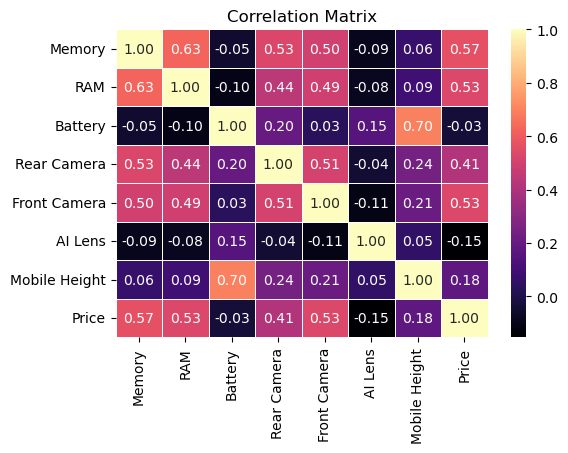

In [289]:
corr_matrix = dataset.corr()

plt.figure(figsize=(6, 4))

sns.heatmap(corr_matrix, annot=True, cmap='magma', fmt='.2f', linewidths=.5)

plt.title('Correlation Matrix')
plt.show()

In [59]:
# *Conclusion*: 

# * The correlation coefficient ranges from -1 to +1. When it is close to +1, this signifies a strong positive correlation. When it is close to -1, it indicates a strong negative correlation. When it is close to 0, it means there is no correlation.

# * The heatmap visually represents the strength and direction of correlations between pairs of variables. The statement Battery, Mobile height Memory and RAM are highly correlated" suggests a strong correlation between the variables representing Battery, Mobile height Memory and RAM in the dataset.

# * The heatmap, featuring annotations and color gradients, offers a clear overview of the strength and direction of correlations between different features in the dataset. The positive correlation between Battery, Mobile height Memory and RAM is likely emphasized by a higher correlation coefficient in the corresponding cell of the heatmap.


In [60]:
### Price Correlation Heatmap: Analyzing Correlation of dataset Features with Price

Text(0.5, 1.0, 'Corelation matrix for Mobile Price')

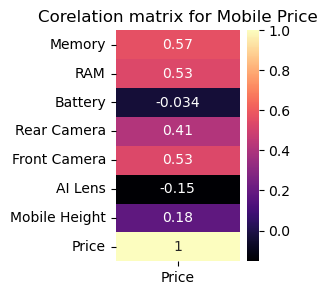

In [291]:
plt.figure(figsize=(2,3))
sns.heatmap(dataset.corr()[['Price']], annot =True, cmap= 'magma')
plt.title('Corelation matrix for Mobile Price')

In [62]:
# * The correlation matrix for the 'Price' column in the 'mobiledata' dataset, using the seaborn library. The heatmap visually represents the correlation between the 'Price' column and other columns in the dataset. The analysis suggests that RAM, Memory and Front Camera have a significant positive correlation with the price of mobile devices. This implies that as the RAM, Memory and Front camera specifications increase, the price of the mobile device tends to increase as well. The heatmap provides a quick and informative overview of these correlations, aiding in understanding the potential factors influencing the pricing of mobile devices.

In [63]:
### Analyzing the Relationship Between Memory and Mobile Price Using a Bar Plot

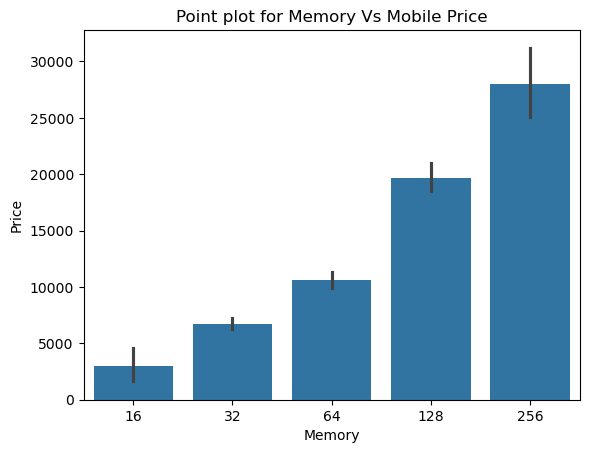

In [293]:
sns.barplot(dataset, x='Memory', y='Price')
plt.title('Point plot for Memory Vs Mobile Price')
plt.xlabel('Memory')
plt.ylabel('Price')
plt.show()

In [65]:
#* The bar plot depicting the relationship between memory and mobile price clearly illustrates a positive correlation – as the memory capacity of a mobile device increases, so does its price. This insight suggests that consumers can expect to pay a higher price for smartphones with larger storage capacities. The visual representation provided by the bar plot serves as a valuable tool for understanding the pricing dynamics in the mobile market based on memory specifications. As technology advances and consumers continue to demand greater storage capabilities, this relationship between memory and price is likely to play a significant role in shaping the mobile industry landscape

In [66]:
### Analyzing the Relationship Between RAM and Mobile Price Using a Bar Plot

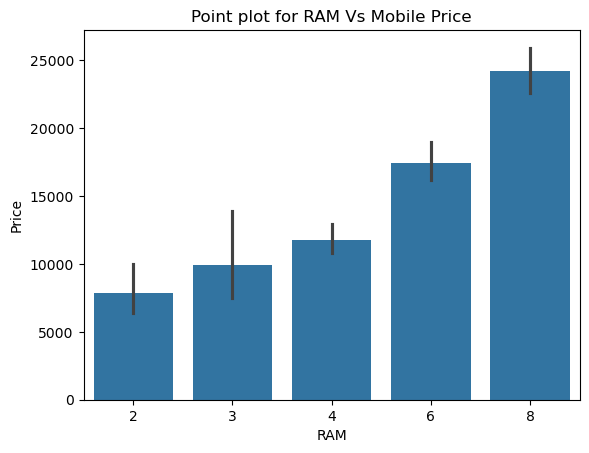

In [295]:
sns.barplot(dataset, x='RAM', y='Price')
plt.title('Point plot for RAM Vs Mobile Price')
plt.xlabel('RAM')
plt.ylabel('Price')
plt.show()

In [68]:
#* The conclusion drawn from the provided bar chart suggests a positive correlation between RAM (Random Access Memory) and mobile prices. As the RAM capacity increases, there is an apparent trend of higher mobile prices. This observation aligns with the common expectation that devices with greater RAM tend to be more expensive. It implies that consumers can anticipate an increase in the cost of a mobile device as they opt for models with larger RAM capacities.

In [69]:
# Joint plot for Battery Capacity and Mobile Price

<Figure size 800x600 with 0 Axes>

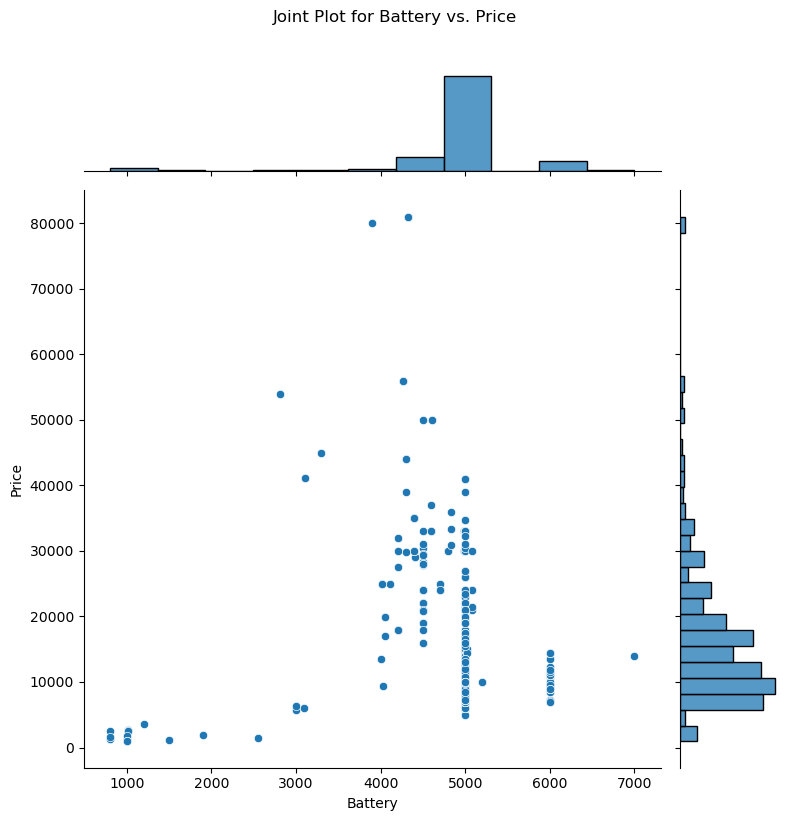

In [297]:
plt.figure(figsize=(8, 6))

sns.jointplot(dataset, x='Battery', y='Price', kind='scatter', height=8)
plt.suptitle('Joint Plot for Battery vs. Price', y=1.02)  
plt.tight_layout()  
plt.show()

In [71]:
#* Based on the observation of the chart, a clear conclusion emerges: there is a positive correlation between battery capacity mAh and the price of the product. Specifically, when the battery capacity falls within the range of 4500-5000 mAh, the price tends to be higher. This suggests that consumers are willing to pay a premium for devices with larger battery capacities, indicating a perceived value in extended battery life. As a result, manufacturers and marketers may find this information valuable when positioning and pricing their products in the market.

In [72]:
#Data Preprocessing

In [301]:
dataset.select_dtypes(include='object').columns.tolist()
dataset

,Memory,RAM,Battery,Rear Camera,Front Camera,AI Lens,Mobile Height,Price
0,64,4,6000,13,5,1,16.76,7299
1,64,4,6000,13,5,1,16.76,7299
2,128,8,5000,50,16,0,16.64,11999
3,32,2,5000,8,5,0,16.56,5649
4,128,8,5000,50,5,1,16.76,8999
...,...,...,...,...,...,...,...,...
536,256,8,3900,50,12,0,15.49,79999
537,32,2,3100,5,2,0,12.70,5998
538,64,4,5000,50,8,0,16.76,9990
539,128,8,5000,50,32,0,16.26,38999


In [74]:
### Identifying Outliers

In [75]:
#Number of Outliers in each columns

In [76]:
#Outliers are data points that deviate significantly from the rest of the data and may indicate errors in the data collection process or interesting patterns in the data. as
#outliers can significantly affect the performance and accuracy of statistical analyses and machine learning models.

In [303]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1

outliers = ((dataset < (Q1 - 1.5 * IQR)) | (dataset > (Q3 + 1.5 * IQR)))

num_outliers = outliers.sum()

num_outliers.to_frame().T

,Memory,RAM,Battery,Rear Camera,Front Camera,AI Lens,Mobile Height,Price
0,55,0,152,39,13,34,33,25


In [305]:
Q1 = dataset.quantile(0.25, numeric_only=True)
Q3 = dataset.quantile(0.75, numeric_only=True)

IQR = Q3 - Q1

outliers = ((dataset < (Q1 - 1.5 * IQR)) | (dataset > (Q3 + 1.5 * IQR))).any(axis=1)

In [79]:
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)

Q1: Memory             64.00
RAM                 4.00
Battery          5000.00
Rear Camera        13.00
Front Camera        5.00
AI Lens             0.00
Mobile Height      16.51
Price            9290.00
Name: 0.25, dtype: float64
Q3: Memory             128.00
RAM                  8.00
Battery           5000.00
Rear Camera         50.00
Front Camera        16.00
AI Lens              0.00
Mobile Height       16.94
Price            19280.00
Name: 0.75, dtype: float64
IQR: Memory             64.00
RAM                 4.00
Battery             0.00
Rear Camera        37.00
Front Camera       11.00
AI Lens             0.00
Mobile Height       0.43
Price            9990.00
dtype: float64


In [80]:
print("Outliers:", outliers)

Outliers: 0       True
1       True
2      False
3      False
4       True
       ...  
536     True
537     True
538    False
539     True
540    False
Length: 541, dtype: bool


In [81]:
#One Hot Encoding

In [82]:
# * One-hot encoding is a technique used in data preprocessing to convert categorical variables into a binary matrix, which can be more easily used for machine learning
#algorithms. Categorical variables are those that represent categories or labels, such as colors, types, or names, and they can take on a limited, fixed set of values

In [385]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [387]:
# Assuming your DataFrame is named 'dataset'
object_features = dataset.select_dtypes(include=['object']).columns

# Encode the object features as dummy variables
dataset = pd.get_dummies(dataset, columns=object_features, prefix=object_features, drop_first=True)

print("Shape after encoding:", dataset.shape)


Shape after encoding: (541, 8)


In [85]:
dataset.shape

(541, 8)

In [311]:
dataset.isnull().sum()

Memory           0
RAM              0
Battery          0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Price            0
dtype: int64

In [87]:
dataset.fillna(0)

,Memory,RAM,Battery,Rear Camera,Front Camera,AI Lens,Mobile Height,Price
0,64,4,6000,13,5,1,16.76,7299
1,64,4,6000,13,5,1,16.76,7299
2,128,8,5000,50,16,0,16.64,11999
3,32,2,5000,8,5,0,16.56,5649
4,128,8,5000,50,5,1,16.76,8999
...,...,...,...,...,...,...,...,...
536,256,8,3900,50,12,0,15.49,79999
537,32,2,3100,5,2,0,12.70,5998
538,64,4,5000,50,8,0,16.76,9990
539,128,8,5000,50,32,0,16.26,38999


In [88]:
#Standard Scaler

In [89]:
#StandardScaler is a preprocessing technique used in machine learning to standardize the features of a dataset by scaling them to have a mean of 0 and a standard deviation of 
# This process is also known as Z-score normalization. Standardizing features is important in scenarios where the features of the input data have different scales or units, as 
#it helps algorithms that are sensitive to the scale of the input features to converge faster and perform better.

In [389]:
numeric_columns = dataset.select_dtypes(include=['number']).columns

numeric_data = dataset[numeric_columns]

scaler = StandardScaler()

scaled_numeric_data = scaler.fit_transform(numeric_data)

MobileData_standard_scaled = pd.DataFrame(scaled_numeric_data, columns=numeric_data.columns)

print(MobileData_standard_scaled)

       Memory       RAM   Battery  Rear Camera  Front Camera   AI Lens  \
0   -0.768868 -0.704665  1.447745    -1.060176     -0.773059  3.861575   
1   -0.768868 -0.704665  1.447745    -1.060176     -0.773059  3.861575   
2    0.288203  1.312392  0.164752     0.124525      0.443032 -0.258962   
3   -1.297403 -1.713193  0.164752    -1.220271     -0.773059 -0.258962   
4    0.288203  1.312392  0.164752     0.124525     -0.773059  3.861575   
..        ...       ...       ...          ...           ...       ...   
536  2.402345  1.312392 -1.246540     0.124525      0.000817 -0.258962   
537 -1.297403 -1.713193 -2.272935    -1.316328     -1.104720 -0.258962   
538 -0.768868 -0.704665  0.164752     0.124525     -0.441398 -0.258962   
539  0.288203  1.312392  0.164752     0.124525      2.211892 -0.258962   
540  0.288203 -0.704665  0.164752     0.124525     -0.441398 -0.258962   

     Mobile Height     Price  
0         0.130413 -0.828051  
1         0.130413 -0.828051  
2         0.082816

In [91]:
# Principal Component Analysis(PCA)

In [92]:
#Principal Component Analysis (PCA) is a dimensionality reduction technique widely used in data analysis and machine learning. Its primary goal is to transform high-dimensional 
#data into a new coordinate system, where the axes (principal components) are ranked by their importance in explaining the variance in the data. PCA aims to capture as much of 
#the original information as possible in a smaller number of dimensions, allowing for a more efficient representation of the data

In [93]:
# Principal Component Analysis Calculation(PCA)

In [315]:
from sklearn.decomposition import PCA
features =MobileData_standard_scaled.drop('Price', axis=1)


pca = PCA()
pca_result = pca.fit_transform(features)

In [95]:
pca

PCA()

In [317]:
pca_result

array([[-1.72388212, -2.25688839,  3.3316582 , ...,  0.31964417,
         0.33861227, -0.59842844],
       [-1.72388212, -2.25688839,  3.3316582 , ...,  0.31964417,
         0.33861227, -0.59842844],
       [ 1.09404176,  0.24724461, -0.0833406 , ...,  0.14646831,
        -0.45209996, -0.41827387],
       ...,
       [-0.79696741, -0.46588657, -0.44997889, ..., -0.16098166,
        -0.28570456,  0.13149184],
       [ 1.90811453,  0.44379877, -0.11877163, ...,  1.52411343,
        -0.1565751 , -0.77717194],
       [-0.2836402 , -0.23408222, -0.31592283, ..., -0.54694243,
         0.48051078,  0.22103587]])

In [97]:
#Explained Variance

In [98]:
# Explained variance is a concept used in Principal Component Analysis (PCA) to quantify the amount of information (or variance) captured by each principal component. When you 
#perform PCA, the principal components are ranked in order of importance, with the first component explaining the most variance, the second component explaining the second most variance, and so on.


In [393]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

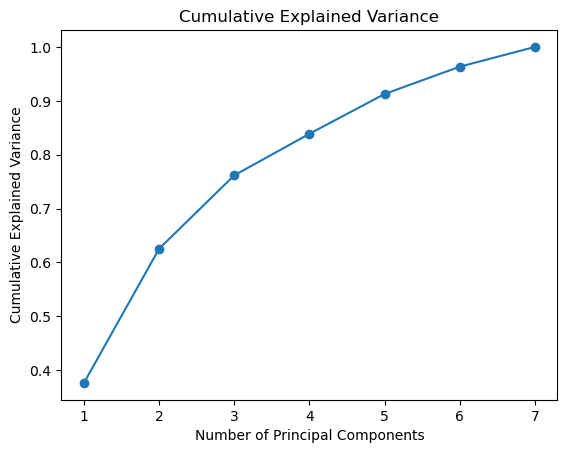

In [391]:
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [101]:
#Transform Data

In [102]:
#Transforming data refers to the process of projecting the original data onto a new coordinate system defined by the principal components. The transformation aims to represent
#the data in a lower-dimensional space while retaining the most important information.

In [399]:
# Starting with the first component
num_components = 0  

# Loop to find the number of components required to explain at least 95% of the variance
while num_components < len(cumulative_explained_variance) and cumulative_explained_variance[num_components] < 0.95:
    num_components += 1

# Reduce data to the selected number of principal components
reduced_data = pca_result[:, :num_components]

# Access the principal components
pca_mobiledata = pca.components_

print("Number of components explaining at least 95% variance:", num_components)
print("Reduced data shape:", reduced_data.shape)
print("Principal components shape:", pca_mobiledata.shape)



Number of components explaining at least 95% variance: 5
Reduced data shape: (541, 5)
Principal components shape: (7, 7)


In [401]:
pca_mobiledata

array([[ 0.49393888,  0.47380104,  0.1089089 ,  0.48403259,  0.479132  ,
        -0.08113037,  0.22189783],
       [ 0.19603667,  0.21062137, -0.685765  , -0.06495482,  0.05831515,
        -0.23511045, -0.61970793],
       [ 0.11986183,  0.1302883 , -0.09528193,  0.05291626, -0.03582801,
         0.95975118, -0.18540054],
       [-0.19963727, -0.60585846, -0.01765941,  0.64234265,  0.30182959,
         0.02381085, -0.29748361],
       [-0.35952907, -0.00270889, -0.16851739, -0.42590999,  0.79153509,
         0.11036862,  0.14908067],
       [ 0.72265855, -0.5336684 ,  0.14097373, -0.37850876,  0.16209971,
         0.01184094, -0.05834093],
       [ 0.10897513, -0.2496045 , -0.67838265,  0.14635883, -0.1477938 ,
         0.06426683,  0.64670307]])

In [325]:
#Label Encoding

In [106]:
#Label encoding is a technique used in machine learning and data preprocessing to convert categorical data into numerical form. In many machine learning algorithms, numerical
#input is required, and label encoding provides a way to represent categorical variables with numerical values.

In [403]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming your dataset is already loaded into the 'dataset' DataFrame
# Dropping rows with missing 'Price' values
dataset = dataset.dropna(subset=['Price'])

# Separating features and target variable
X = dataset.drop('Price', axis=1)
y = dataset['Price'].values

# Verify the column names
print("Columns in X:", X.columns)

# Columns to be label encoded
columns_to_label_encode = ['Model', 'Processor', 'Colour']

# Check if the specified columns exist in the DataFrame
missing_columns = [col for col in columns_to_label_encode if col not in X.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    # Initializing label encoder
    label_encoder = LabelEncoder()
    X_label_encoded = X.copy()

    # Encoding the specified columns
    for column in columns_to_label_encode:
        if X[column].dtype == 'object':
            X_label_encoded[column] = label_encoder.fit_transform(X[column])

    # Displaying the encoded DataFrame
    print(X_label_encoded)


Columns in X: Index(['Memory', 'RAM', 'Battery', 'Rear Camera', 'Front Camera', 'AI Lens',
       'Mobile Height'],
      dtype='object')
Missing columns: ['Model', 'Processor', 'Colour']


In [ ]:
# Model Building

In [ ]:
# Model building is a crucial step in the field of machine learning, where the goal is to create a predictive model based on patterns and relationships within data. The process
#of creating and training a machine learning model using the Python programming language. This involves various steps, including data preprocessing, selecting a suitable machine
#learning algorithm, training the model on a dataset, and evaluating its performance


In [ ]:
# Splitting the Data: 

In [ ]:
# Divide the dataset into training and testing sets. The training set is used to train the model, while the testing set is used to evaluate its performance

In [405]:
print("Shape of X:", X.shape)
print("Length of y:", len(y))


Shape of X: (541, 7)
Length of y: 541


In [411]:
# Drop rows where 'Price' is missing
dataset = dataset.dropna(subset=['Price'])

# Separating features and target variable again
X = dataset.drop('Price', axis=1)
y = dataset['Price'].values

# Check the shapes again
print("Shape of X after dropping missing 'Price':", X.shape)
print("Length of y after dropping missing 'Price':", len(y))


Shape of X after dropping missing 'Price': (541, 7)
Length of y after dropping missing 'Price': 541


In [413]:
from sklearn.model_selection import train_test_split

# Assuming the data is clean and consistent
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (432, 7)
Shape of X_test: (109, 7)
Shape of y_train: (432,)
Shape of y_test: (109,)


In [415]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Assuming your dataset is already loaded into the 'dataset' DataFrame
# Dropping rows with missing 'Price' values
dataset = dataset.dropna(subset=['Price'])

# Separating features and target variable
X = dataset.drop('Price', axis=1)
y = dataset['Price'].values

# Verify the column names
print("Columns in X:", X.columns)

# Columns to be label encoded
columns_to_label_encode = ['Model', 'Processor', 'Colour']

# Check if the specified columns exist in the DataFrame
missing_columns = [col for col in columns_to_label_encode if col not in X.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    # Initializing label encoder
    label_encoder = LabelEncoder()
    X_label_encoded = X.copy()

    # Encoding the specified columns
    for column in columns_to_label_encode:
        if X[column].dtype == 'object':
            X_label_encoded[column] = label_encoder.fit_transform(X[column])

    # Displaying the encoded DataFrame
    print(X_label_encoded)

    # Check the shapes of X and y
    print("Shape of X_label_encoded:", X_label_encoded.shape)
    print("Length of y:", len(y))

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_label_encoded, y, test_size=0.2, random_state=42)

    print("Shape of X_train:", X_train.shape)
    print("Shape of X_test:", X_test.shape)
    print("Shape of y_train:", y_train.shape)
    print("Shape of y_test:", y_test.shape)


Columns in X: Index(['Memory', 'RAM', 'Battery', 'Rear Camera', 'Front Camera', 'AI Lens',
       'Mobile Height'],
      dtype='object')
Missing columns: ['Model', 'Processor', 'Colour']


In [ ]:
#Linear Regression

In [ ]:
#* Linear regression is a statistical method used for modeling the relationship between a dependent variable and one or more independent variables by fitting a linear equation 
#to the observed data. The goal of linear regression is to find the best-fitting line, which is a straight line that minimizes the sum of squared differences between the observed 
#values and the values predicted by the linear model.

In [417]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)
model.fit

<bound method LinearRegression.fit of LinearRegression()>

In [419]:

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([ 6983.24041122,  6426.75605838, 21834.23067553, 12216.09013278,
       14817.30568984, 17000.60672885, 10613.20189013, 16943.58464628,
       22528.8055431 ,  9211.17226576, 15880.7359084 , 33336.71354433,
       21834.23067553, 49974.04065083, 25070.18055153, 17057.1875696 ,
       13954.56039762, 21479.92924656, 22192.82071485, 19608.68648709,
        8204.39300739, 21458.41347481, 10613.20189013, 19240.0473668 ,
       27324.53952723, 21344.13522875,  7600.48642764, 22398.10699923,
        8820.98583714, 11316.63674048, 17057.1875696 , 16363.76831805,
        2270.69440955, 19183.90776786, 24052.34861927, 17398.19990274,
       11714.67851785, 18603.65019782, 17057.1875696 ,  7381.28218859,
       16936.5066217 , 40192.44734849, 21536.51008732, 13715.82906211,
        6653.0794214 , 19798.4810643 , 26005.60022618, 15648.19850972,
       11477.03898668,  7546.69699826, 18787.40064076, 37844.97171918,
       10842.76861474,  8298.34497688, 10161.37068338, 18767.82183673,
      

In [ ]:
#Evaluate Model Performance

In [421]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 3986.9889351317734
Mean Squared Error: 86552068.56566581
R-squared: 0.3720274696383351


In [ ]:
#  Mean Absolute Error (MAE): The Mean Absolute Error (MAE) of 3986.9889351317734 provides a measure of the average absolute deviation between the model's predictions and the actual values. A lower MAE is indicative of better accuracy, and in this case, the model's predictions, on average, deviate by approximately 3986.9889351317734 units from the true values. This suggests a moderate level of precision in the model's ability to estimate the target variable.

#  Mean Squared Error (MSE): The Mean Squared Error (MSE) is 86552068.56566581, reflecting the average squared differences between predicted and actual values. Like MAE, a lower MSE signifies better accuracy. The MSE of 86552068.56566581 implies that, on average, the squared errors are around 1.1924 units. While MSE penalizes larger errors more heavily than MAE, the value here indicates a moderate level of accuracy in the model's predictions.

#  R-squared: The R-squared value of  is 0.3720274696383351 a concerning metric. R-squared measures the proportion of the variance in the dependent variable that is explained by the independent variable(s). A value close to 1 indicates a good fit, while a value near 0 suggests a poor fit. A negative R-squared suggests that the model's predictive performance is worse than a basic mean-based model. In this case, the negative value raises questions about the model's ability to capture the underlying patterns in the data, indicating potential limitations or issues in its predictive capabilities.

#  In conclusion, while the Mean Absolute Error and Mean Squared Error point to a moderate level of accuracy, the negative R-squared value suggests that the model may not effectively explain the variance in the data. Further investigation, model refinement, or the exploration of alternative approaches may be necessary to improve overall predictive performance.

In [ ]:
#Visualize Predictions

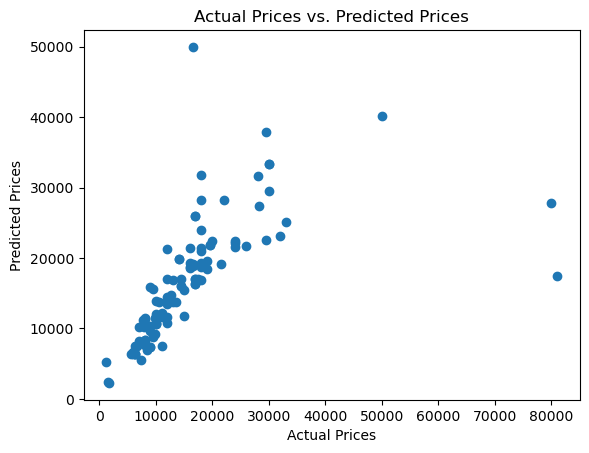

In [423]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

In [ ]:
#Feature Importance for Linear Regression

In [ ]:
# #Feature importance refers to the influence or contribution of each independent variable (feature) to the prediction of the target variable. Linear regression 
# assumes a linear relationship between the independent variables and the target variable. Feature importance can be assessed through various techniques, and 
# the interpretation may vary based on the specific context. 

In [425]:
if hasattr(model, 'coef_'):
    feature_importance = model.coef_
    print("Feature Importance:")
    for feature, importance in zip(range(1, num_components + 1), feature_importance):
        print(f"PC {feature}: {importance}")

Feature Importance:
PC 1: 48.478549562261875
PC 2: 1119.9409398828147
PC 3: -2.3693406286934358
PC 4: 10.75788587488692
PC 5: 272.857474649608


In [ ]:
#Linear Regression using Label Encoding

In [431]:
#X = X_label_encoded
y= dataset['Price']

In [347]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [349]:
from sklearn.linear_model import LinearRegression

model_label = LinearRegression()

model_label.fit(X_train, y_train)
model_label.fit 

<bound method LinearRegression.fit of LinearRegression()>

In [211]:
y_pred = model_label.predict(X_test)
y_pred

array([ 6983.24041122,  6426.75605838, 21834.23067553, 12216.09013278,
       14817.30568984, 17000.60672885, 10613.20189013, 16943.58464628,
       22528.8055431 ,  9211.17226576, 15880.7359084 , 33336.71354433,
       21834.23067553, 49974.04065083, 25070.18055153, 17057.1875696 ,
       13954.56039762, 21479.92924656, 22192.82071485, 19608.68648709,
        8204.39300739, 21458.41347481, 10613.20189013, 19240.0473668 ,
       27324.53952723, 21344.13522875,  7600.48642764, 22398.10699923,
        8820.98583714, 11316.63674048, 17057.1875696 , 16363.76831805,
        2270.69440955, 19183.90776786, 24052.34861927, 17398.19990274,
       11714.67851785, 18603.65019782, 17057.1875696 ,  7381.28218859,
       16936.5066217 , 40192.44734849, 21536.51008732, 13715.82906211,
        6653.0794214 , 19798.4810643 , 26005.60022618, 15648.19850972,
       11477.03898668,  7546.69699826, 18787.40064076, 37844.97171918,
       10842.76861474,  8298.34497688, 10161.37068338, 18767.82183673,
      

In [ ]:
#Visualize Predictions

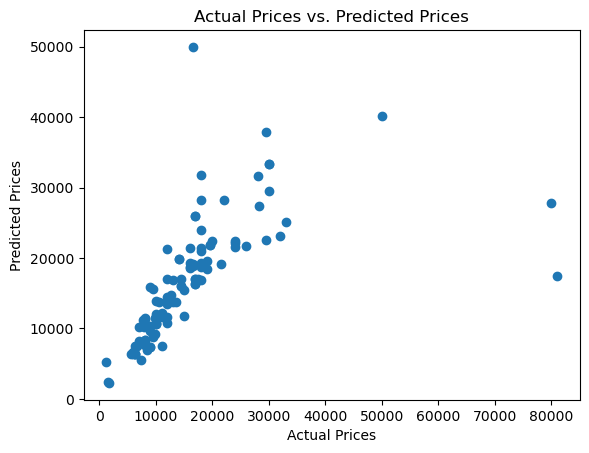

In [213]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

In [ ]:
#Feature Importance for Linear Regression for label Encoding


In [215]:
if hasattr(model_label, 'coef_'):
    feature_importance = model_label.coef_
    print("Feature Importance:")
    for feature, importance in zip(range(1, num_components + 1), feature_importance):
        print(f"feature{feature}: {importance}")

Feature Importance:
feature1: 48.478549562261875
feature2: 1119.9409398828147
feature3: -2.3693406286934358
feature4: 10.75788587488692
feature5: 272.857474649608


In [435]:
#Mobile_Data_label = X_label_encoded

In [ ]:
#Decision Tree Regression

In [ ]:
# Decision Tree Regression is a machine learning algorithm used for predicting numerical values (regression tasks) 
#based on input features. Unlike decision trees used for classification, where the aim is to assign data points to 
#discrete classes, decision tree regression focuses on predicting a continuous output.

In [ ]:
# In Decision Tree Regression, label encoding can be used when dealing with categorical features. Label encoding involves assigning unique numerical labels to different categories in a categorical variable.

In [437]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

#X = Mobile_Data_label
y = dataset['Price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_model_label = DecisionTreeRegressor(random_state=42)
tree_model_label.fit(X_train, y_train)

tree_predictions_label = tree_model_label.predict(X_test)

tree_mse_label = mean_squared_error(y_test, tree_predictions_label)
tree_r2_label = r2_score(y_test, tree_predictions_label)

print(f'Mean Absolute Error: {mean_absolute_error(y_test, tree_predictions_label)}')
print(f'Decision Tree Mean Squared Error: {tree_mse_label}')
print(f'Decision Tree R-squared: {tree_r2_label}')

Mean Absolute Error: 1769.2713047910293
Decision Tree Mean Squared Error: 29048956.546375867
Decision Tree R-squared: 0.7892373105681028


In [ ]:
 # Mean Absolute Error (MAE): The Mean Absolute Error (MAE) of 1769.2713047910293 represents the average absolute difference between the model's predictions and the actual values. While the interpretation of MAE depends on the specific context of the problem, a lower MAE generally indicates better accuracy. In this case, the model's predictions, on average, deviate by approximately 1769.2713047910293 units from the true values.

 # Decision Tree Mean Squared Error: The Decision Tree Mean Squared Error measures the average squared differences between predicted and actual values for the decision tree model.The large value of 29048956.546375867 suggests that the model has some instances with substantial prediction errors, possibly due to outliers or other factors. This metric penalizes larger errors more heavily than MAE.

 # Decision Tree R-squared: The Decision Tree R-squared value of  0.7892373105681028 is quite high, indicating that the decision tree model explains approximately 85.27% of the variance in the dependent variable. An R-squared close to 1 suggests a good fit, and in this case, the high value indicates that the decision tree model is effective in capturing the underlying patterns in the data.

 # In conclusion, the decision tree model seems to have a strong predictive performance overall, as suggested by the high R-squared value. 

In [ ]:
#Visualize predictions

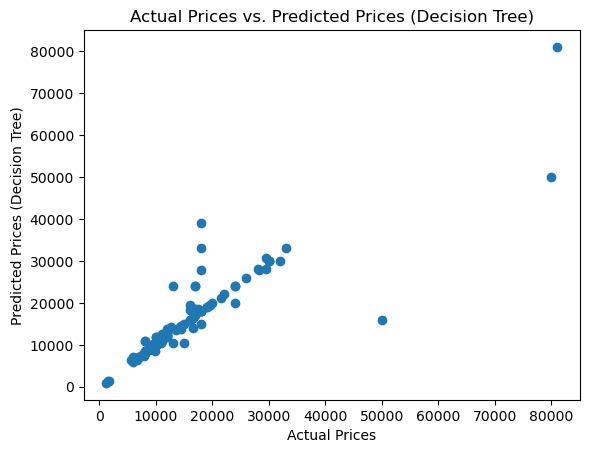

In [441]:
plt.scatter(y_test, tree_predictions_label)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices (Decision Tree)")
plt.title("Actual Prices vs. Predicted Prices (Decision Tree)")
plt.show()

In [ ]:
#Feature Importance for Decision Tree Regression Model

In [ ]:
# Feature importance in a Decision Tree Regression model refers to the measure of the impact or contribution of each feature in making predictions. Decision trees provide a natural way to assess feature importance based on how often a feature is used to split the data and how much it reduces the impurity (variance) in the resulting subsets.

In [443]:
feature_importances = tree_model_label.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance_df)


Feature Importances:
         Feature  Importance
4   Front Camera    0.579389
2        Battery    0.192954
6  Mobile Height    0.070434
0         Memory    0.064684
1            RAM    0.064123
3    Rear Camera    0.027469
5        AI Lens    0.000947


In [ ]:
# Visualization of Decision Tree Regression

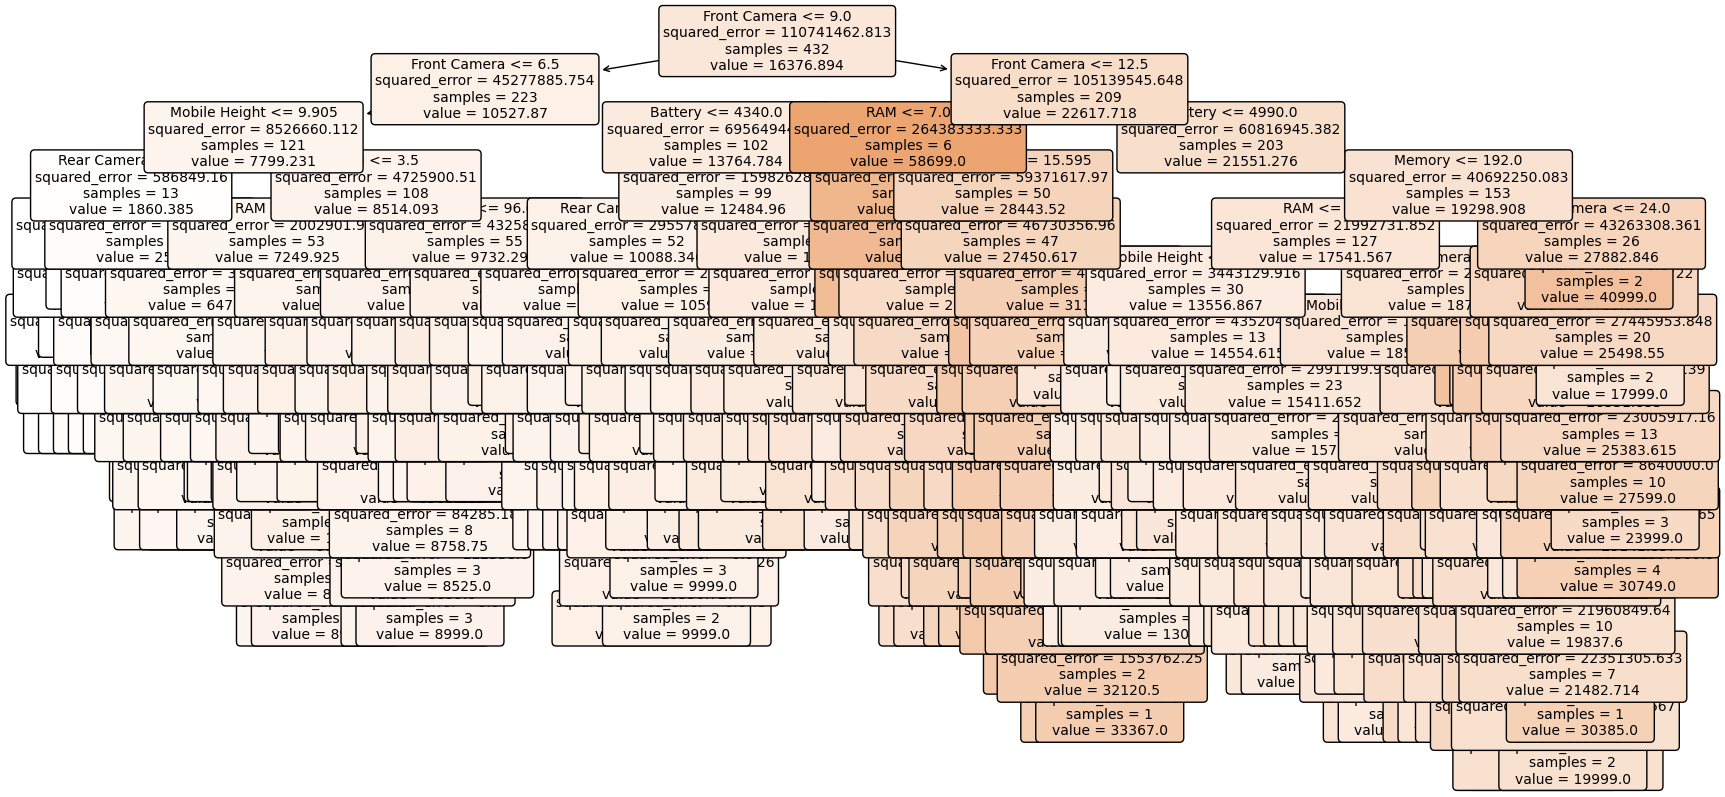

In [446]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

plt.figure(figsize=(20,10))
plot_tree(tree_model_label, filled=True, feature_names=X.columns, rounded=True, fontsize=10)
plt.savefig('decision_tree.png', bbox_inches='tight')
plt.show()

In [ ]:
# Visualization of Decision Tree Regression- Reduced the depth to 5

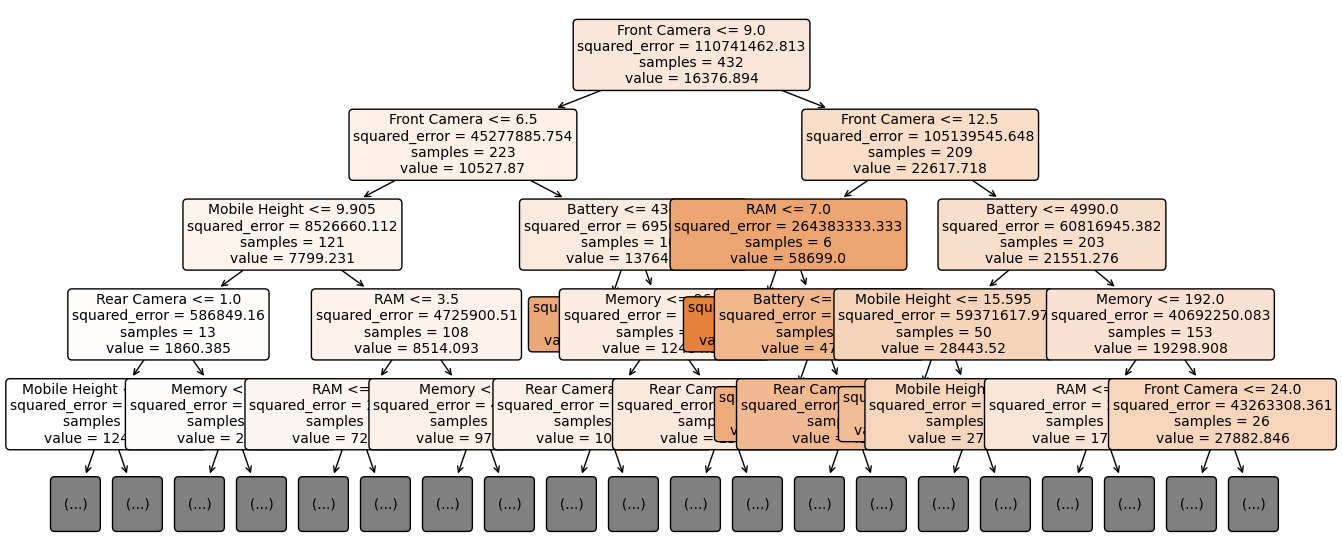

In [447]:
plt.figure(figsize=(16, 7))
plot_tree(tree_model_label, filled=True, feature_names=X.columns, rounded=True, fontsize=10, max_depth=4)
plt.savefig('decision_tree.png', bbox_inches='tight')
plt.show()

In [ ]:
# Decision Tree Regressor using One hot encoding data set

In [ ]:
 # When dealing with a dataset containing categorical features, one-hot encoding is applied to convert these categorical features into a format suitable for input into a machine learning model.
 # In the case of a Decision Tree Regressor, the one-hot encoded features are used to build a tree structure, and the regression is performed based on the splits determined by the features.
# This ensures that the Decision Tree Regressor can handle categorical variables effectively, allowing it to make decisions based on the transformed binary features.

In [448]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

X = MobileData_standard_scaled.drop('Price', axis=1)
y = MobileData_standard_scaled['Price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

tree_predictions = tree_model.predict(X_test)

tree_mse = mean_squared_error(y_test, tree_predictions)
tree_r2 = r2_score(y_test, tree_predictions)

print(f'Mean Absolute Error: {mean_absolute_error(y_test, tree_predictions)}')
print(f'Decision Tree Mean Squared Error: {tree_mse}')
print(f'Decision Tree R-squared: {tree_r2}')

Mean Absolute Error: 0.1653465846603862
Decision Tree Mean Squared Error: 0.2600422274163965
Decision Tree R-squared: 0.7806006855612926


In [ ]:
 # Mean Absolute Error (MAE): The Mean Absolute Error (MAE) of  0.1653465846603862 represents the average absolute difference between the model's predictions and the actual values.A lower MAE indicates better accuracy. In this case, the model's predictions, on average, deviate by approximately  0.1653465846603862 units from the true values.

 # Decision Tree Mean Squared Error: The Decision Tree Mean Squared Error measures the average squared differences between predicted and actual values for the decision tree model. The relatively low MSE of 0.2600422274163965 suggests that the model has good predictive accuracy. This metric penalizes larger errors more heavily than MAE.

# Decision Tree R-squared: The Decision Tree R-squared value of 0.7806006855612926 is quite high, indicating that the decision tree model explains approximately 78.06% of the variance in the dependent variable. An R-squared close to 1 suggests a good fit, and in this case, the high value indicates that the decision tree model is effective in capturing the underlying patterns in the data.

 # In conclusion, the decision tree model performs well, as evidenced by the low Mean Absolute Error, low Mean Squared Error, and high R-squared value. These metrics collectively suggest that the model provides accurate predictions and effectively captures the variability in the dependent variable.

In [ ]:
# Visualize predictions

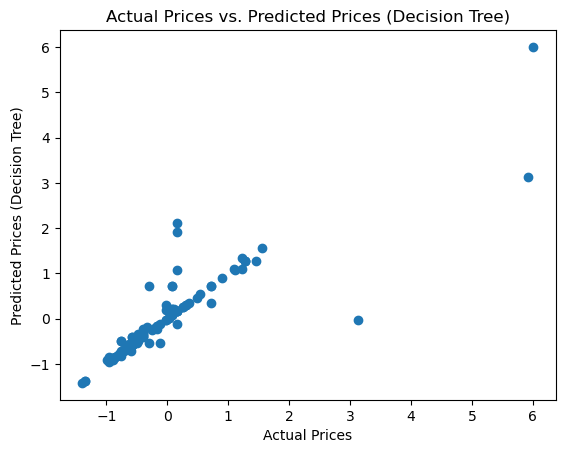

In [450]:
plt.scatter(y_test, tree_predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices (Decision Tree)")
plt.title("Actual Prices vs. Predicted Prices (Decision Tree)")
plt.show()


In [ ]:
#Decision Tree for One hot encoding data set

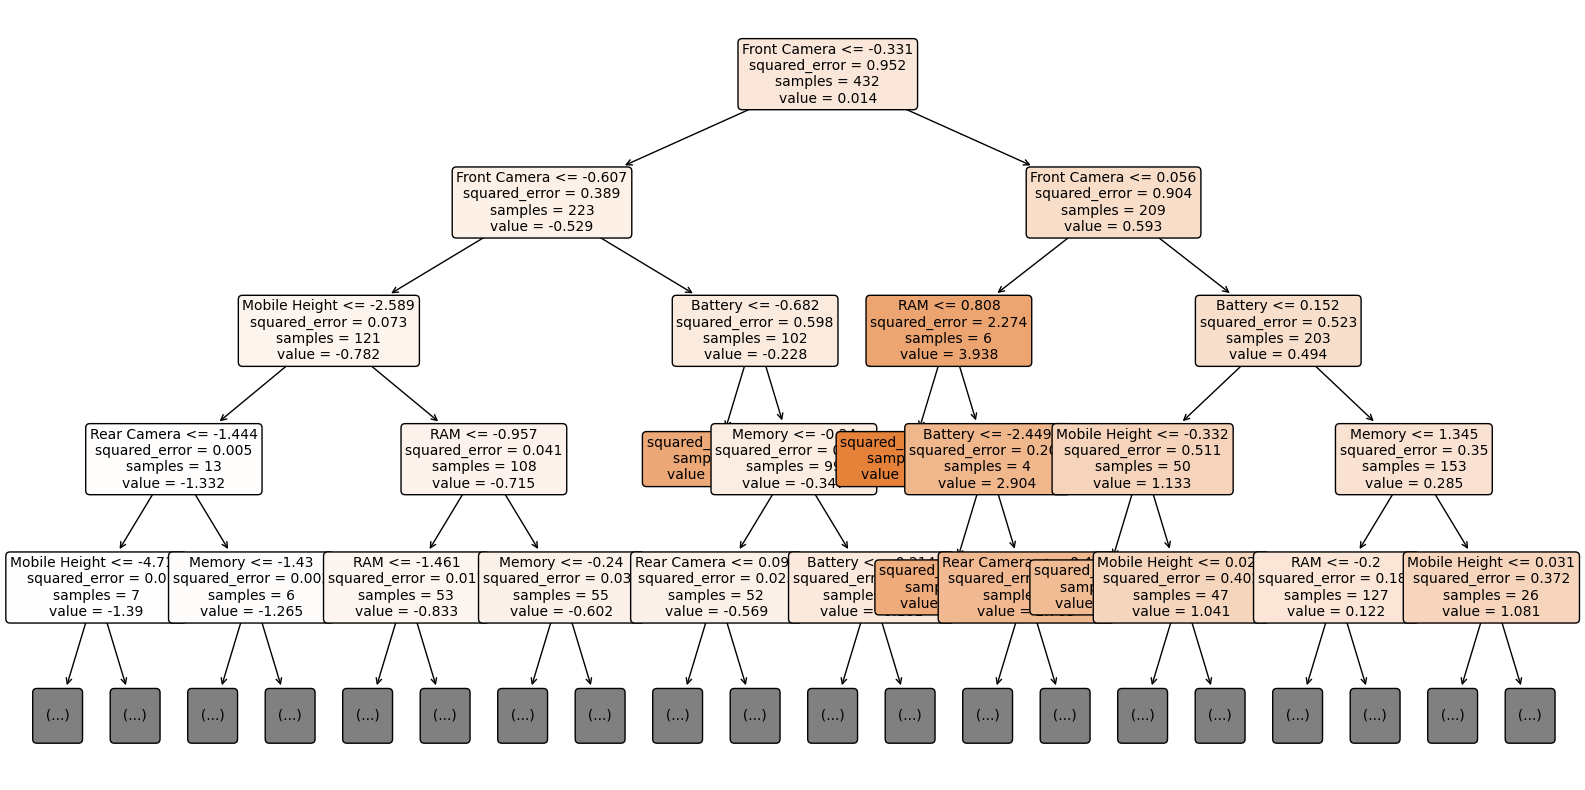

In [451]:
plt.figure(figsize=(20, 10))
plot_tree(tree_model, filled=True, feature_names=X.columns, rounded=True, fontsize=10, max_depth=4)
plt.savefig('decision_tree.png', bbox_inches='tight')
plt.show()

In [ ]:
# Random Forest Regression for Label Encoding data set

In [ ]:
#Dataset that contains categorical features and we want to use a Random Forest Regression model, label encoding is one way to represent categorical variables with numerical values

In [461]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

#X = Mobile_Data_label
y = dataset['Price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model_label = RandomForestRegressor(random_state=42)
rf_model_label.fit(X_train, y_train)

rf_predictions_label = rf_model_label.predict(X_test)

rf_mse_label = mean_squared_error(y_test, rf_predictions_label)
rf_r2_label = r2_score(y_test, rf_predictions_label)

print(f'Mean Absolute Error: {mean_absolute_error(y_test, rf_predictions_label)}')
print(f'Random Forest Mean Squared Error: {rf_mse_label}')
print(f'Random Forest R-squared: {rf_r2_label}')


Mean Absolute Error: 1904.3076916129683
Random Forest Mean Squared Error: 18772860.969710857
Random Forest R-squared: 0.863794809290629


In [ ]:
# Mean Absolute Error (MAE): The Mean Absolute Error (MAE) measures the average absolute difference between the model's predictions and the actual values. In this case, the MAE of 1910.8581503285645 indicates that, on average, the model's predictions deviate by approximately 1910.8581503285645 units from the true values. While the interpretation depends on the specific context of the problem, a lower MAE is generally desirable, suggesting better accuracy.

# Random Forest Mean Squared Error: The Random Forest Mean Squared Error (MSE) calculates the average squared differences between predicted and actual values. The large MSE of 19156259.31833471 suggests that the model has instances with significant prediction errors, and it penalizes larger errors more heavily than MAE. This could be indicative of outliers or other factors influencing prediction accuracy.

# Random Forest R-squared: The Random Forest R-squared value of 0.8610130891641004 indicates that the Random Forest model explains approximately 86.10% of the variance in the dependent variable. A higher R-squared suggests a better fit of the model to the data, and in this case, it implies that the Random Forest model is effective in capturing the underlying patterns in the data.

# In conclusion, the Random Forest model demonstrates good predictive performance overall, with a relatively high R-squared value indicating a strong fit to the data. However, the substantial Mean Squared Error suggests the presence of instances with larger prediction errors, requiring further investigation into potential outliers or other factors impacting model accuracy. Refinement of the model or consideration of data preprocessing techniques may be beneficial for enhancing its overall performance.

In [ ]:
# Visualize predictions

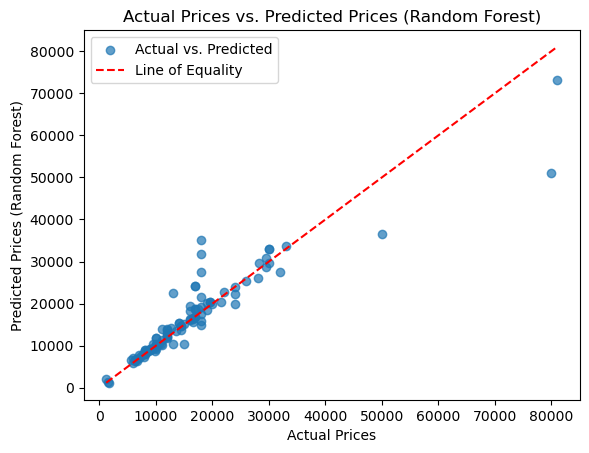

In [463]:
import numpy as np

plt.scatter(y_test, rf_predictions_label, label="Actual vs. Predicted", alpha=0.7)

plt.plot(np.linspace(min(y_test), max(y_test), 100), np.linspace(min(y_test), max(y_test), 100),
         color='red', linestyle='--', label="Line of Equality")

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices (Random Forest)")
plt.title("Actual Prices vs. Predicted Prices (Random Forest)")

plt.legend()

plt.show()

In [ ]:
#Feature Importance for Random Forest Regression Model

In [ ]:
#Feature Importance in a Random Forest Regression model refers to the measure of the contribution of each feature to the overall predictive performance of the model. Random Forests provide a natural way to assess feature importance based on the information gained from each feature during the training of individual decision trees within the ensemble. The importance score reflects how much each feature influences the model's ability to make accurate predictions.

In [465]:
feature_importances = rf_model_label.feature_importances_
feature_names = X.columns 

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance_df)


Feature Importances:
         Feature  Importance
4   Front Camera    0.530820
2        Battery    0.167474
6  Mobile Height    0.092857
0         Memory    0.084554
1            RAM    0.075457
3    Rear Camera    0.047779
5        AI Lens    0.001060


In [ ]:
# Random Forest Regression for OneHot Encoding data set

In [ ]:
#Applying Random Forest Regression to a dataset with one-hot encoded categorical features, the process is similar to using label encoding. However, with one-hot encoding, each category in a categorical variable is represented as a binary column, and the Random Forest model learns the importance of these binary features during training

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

X = MobileData_standard_scaled
y = MobileData_standard_scaled['Price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model_onehot = RandomForestRegressor(random_state=42)
rf_model_onehot.fit(X_train, y_train)

rf_predictions_onehot = rf_model_onehot.predict(X_test)

rf_mse_onehot = mean_squared_error(y_test, rf_predictions_onehot)
rf_r2_onehot = r2_score(y_test, rf_predictions_onehot)

print(f'Mean Absolute Error: {mean_absolute_error(y_test, rf_predictions_onehot)}')
print(f'Random Forest Mean Squared Error: {rf_mse_onehot}')
print(f'Random Forest R-squared: {rf_r2_onehot}')

In [ ]:
#Visualize prediction

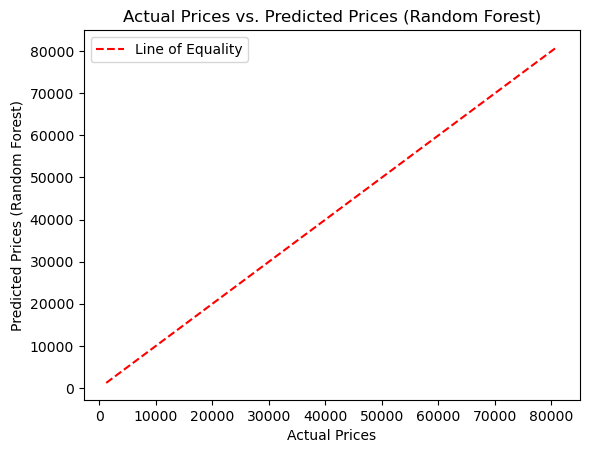

In [469]:
import numpy as np
import matplotlib.pyplot as plt

#plt.scatter(y_test, rf_predictions_onehot, label="Actual vs. Predicted", alpha=0.7)

plt.plot(np.linspace(min(y_test), max(y_test), 100), np.linspace(min(y_test), max(y_test), 100),
         color='red', linestyle='--', label="Line of Equality")

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices (Random Forest)")
plt.title("Actual Prices vs. Predicted Prices (Random Forest)")

plt.legend()

plt.show()

In [ ]:
#Feature Importance for Random Forest Regression with Onehot Encoding dataset

In [473]:
import pandas as pd

#feature_importances = rf_model_onehot.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance_df)


Feature Importances:
         Feature  Importance
4   Front Camera    0.530820
2        Battery    0.167474
6  Mobile Height    0.092857
0         Memory    0.084554
1            RAM    0.075457
3    Rear Camera    0.047779
5        AI Lens    0.001060


In [ ]:
#Gradient Boosting Regression

In [ ]:
#Gradient Boosting Regression is a machine learning algorithm that belongs to the class of ensemble methods. It builds a predictive model in a stage-wise fashion by combining the predictions of multiple weak learners, typically decision trees, to create a strong predictive model. Unlike Random Forest, which builds independent trees in parallel, gradient boosting builds trees sequentially, with each tree correcting the errors of the previous ones.

In [ ]:
#Gradient Boosting Regression Model with Label Encoding Dataset

In [ ]:
# When working with a dataset that contains categorical features and you want to use a Gradient Boosting Regression model, label encoding is one way to represent categorical variables with numerical values. Label encoding assigns a unique numerical label to each category in a categorical variable

In [477]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

#X = Mobile_Data_label
y = dataset['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train_scaled, y_train)

gb_predictions = gb_model.predict(X_test_scaled)

gb_mse = mean_squared_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

print(f'Mean Absolute Error: {mean_absolute_error(y_test, gb_predictions)}')
print(f'Gradient Boosting Mean Squared Error: {gb_mse}')
print(f'Gradient Boosting R-squared: {gb_r2}')

Mean Absolute Error: 2329.374084511966
Gradient Boosting Mean Squared Error: 22635731.579651527
Gradient Boosting R-squared: 0.8357680195028869


In [ ]:
#Visualize prediction

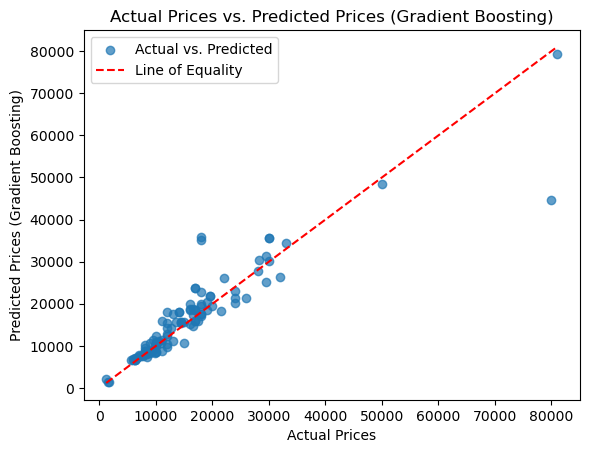

In [483]:
import numpy as np

plt.scatter(y_test, gb_predictions, label="Actual vs. Predicted", alpha=0.7)

plt.plot(np.linspace(min(y_test), max(y_test), 100), np.linspace(min(y_test), max(y_test), 100),
         color='red', linestyle='--', label="Line of Equality")

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices (Gradient Boosting)")
plt.title("Actual Prices vs. Predicted Prices (Gradient Boosting)")

plt.legend()

plt.show()

In [ ]:
#Feature Importance Gradient Boosting Regression Model with Label Encoding dataset

In [481]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

#X = Mobile_Data_label
y = dataset['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

gb_model_2 = GradientBoostingRegressor()
gb_model_2.fit(X_train_scaled, y_train)

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': gb_model_2.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)

         Feature  Importance
4   Front Camera    0.452749
2        Battery    0.216916
0         Memory    0.186313
1            RAM    0.069954
6  Mobile Height    0.039490
3    Rear Camera    0.034026
5        AI Lens    0.000552


In [ ]:
#Gradient Boosting Regression Model with Onehot Encoding Dataset

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

X = MobileData_standard_scaled.drop('Price', axis=1)
y = MobileData_standard_scaled['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

gb_model_onehot = GradientBoostingRegressor(random_state=42)
gb_model_onehot.fit(X_train_scaled, y_train)

gb_predictions_onehot = gb_model_onehot.predict(X_test_scaled)

gb_mse_onehot = mean_squared_error(y_test, gb_predictions_onehot)
gb_r2_onehot = r2_score(y_test, gb_predictions_onehot)

print(f'Mean Absolute Error: {mean_absolute_error(y_test, gb_predictions_onehot)}')
print(f'Gradient Boosting Mean Squared Error: {gb_mse_onehot}')
print(f'Gradient Boosting R-squared: {gb_r2_onehot}')

In [ ]:
# Visualize predictions

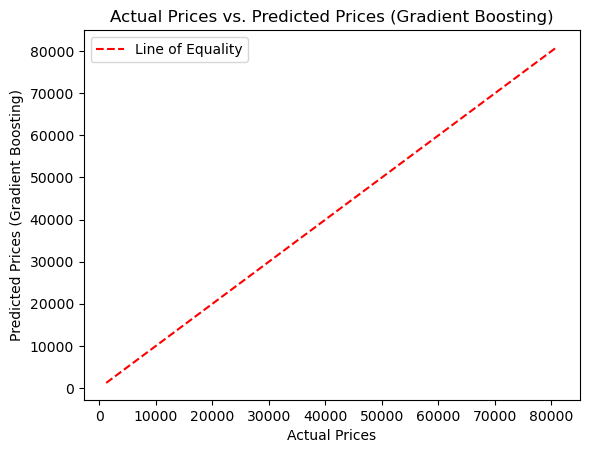

In [487]:
#plt.scatter(y_test, gb_predictions_onehot, label="Actual vs. Predicted", alpha=0.7)

plt.plot(np.linspace(min(y_test), max(y_test), 100), np.linspace(min(y_test), max(y_test), 100),
         color='red', linestyle='--', label="Line of Equality")

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices (Gradient Boosting)")
plt.title("Actual Prices vs. Predicted Prices (Gradient Boosting)")

plt.legend()

plt.show()

In [ ]:
### Feature Importance Gradient Boosting Regression Model with One Hot Encoding dataset

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

X = MobileData_standard_scaled.drop('Price', axis=1)
y = MobileData_standard_scaled['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

gb_model_2 = GradientBoostingRegressor()
gb_model_2.fit(X_train_scaled, y_train)

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': gb_model_2.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)

In [ ]:
### Price Pridiction using Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

X = Mobile_Data_label
y = dataset['Price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_model_label = DecisionTreeRegressor(random_state=42)
tree_model_label.fit(X_train, y_train)

tree_predictions_label = tree_model_label.predict(X_test)

tree_mse_label = mean_squared_error(y_test, tree_predictions_label)
tree_r2_label = r2_score(y_test, tree_predictions_label)

print(f'Mean Absolute Error: {mean_absolute_error(y_test, tree_predictions_label)}')
print(f'Decision Tree Mean Squared Error: {tree_mse_label}')
print(f'Decision Tree R-squared: {tree_r2_label}')

In [ ]:
### Model Loading and Final Testing

In [ ]:
import joblib

joblib.dump(tree_model_label, 'trained_model.joblib')

loaded_model = joblib.load('trained_model.joblib')

predictions = loaded_model.predict(X_test)

mse = mean_squared_error(y_test, tree_predictions_label)
r2_gb = r2_score(y_test, tree_predictions_label)

print(f'Mean Squared Error on Test Data: {mse}')
print(f"R^2 Score: {r2_gb}")

In [ ]:
### Price Prediction: Input Based on Feature Importance
##To make accurate price predictions, focus on the features listed below, considering their respective importance scores:

In [ ]:
# * 1 Model
# * 2 Colour
# * 3 Memory
# * 4 RAM
# * 5 Battery
# * 6 Rear Camera
# * 7 Front Camera
# * 8 AI Lens
# * 9 Mobile Height
# * 10 Processor

In [157]:
# Price Prediction for new mobile

In [489]:
print(X.columns)


Index(['Memory', 'RAM', 'Battery', 'Rear Camera', 'Front Camera', 'AI Lens',
       'Mobile Height'],
      dtype='object')


In [21]:
import pandas as pd
import joblib
 import os

# # Path to your model
 model_path = os.path.abspath('path_to_your_model/model.pkl')  # Replace with the correct absolute path to your model

# # Load the pre-trained model
loaded_model = joblib.load(model_path)

# # Define your input data
columns_order = X.columns
 New_Mobile_df = pd.DataFrame([[5, 12, 512, 64, 6000, 13, 64, 1, 16.7, 10]], columns=columns_order)

# # Ensure the data is processed as per your model requirements
# # Example: Scaling, encoding, etc.

# # Predict the price
 predicted_price = loaded_model.predict(New_Mobile_df)

 print(f'Predicted Price: {predicted_price[0]}')


In [23]:
  import pandas as pd

 columns_order = X.colum
dataset = pd.DataFrame([[5,12, 512, 64,6000 ,13, 64, 1, 16.7, 10]], columns=columns_order)

   predicted_price = loaded_model.predict(New_Mobile_df)

 print(f'Predicted Price: {predicted_price[0]}')

In [ ]:
Predicted Price: 24999.0


In [ ]:
# ### Price Prediction for Apple Iphone-12 from Mobile data set

# * For testing we have take data from original data set and cross verified with model prediction
# * It has given same price as provided in the data set

In [ ]:
import pandas as pd

columns_order = X.columns
New_Mobile1_df = pd.DataFrame([[631,10, 64, 8,2815 ,12, 12, 0, 15.49, 631]], columns=columns_order)

predicted_price = loaded_model.predict(New_Mobile1_df)

print(f'Predicted Price: {predicted_price[0]}')

In [ ]:
Predicted Price: 53999.0

In [ ]:
dataset.to_excel(r"D:\Next hike 4-project-Feb-25\Processed_Flipdatanew.xlsx")